In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
# Load the dataset
df = pd.read_csv('../data/complaints.csv')

/tmp/ipykernel_8573/4221452670.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


In [22]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

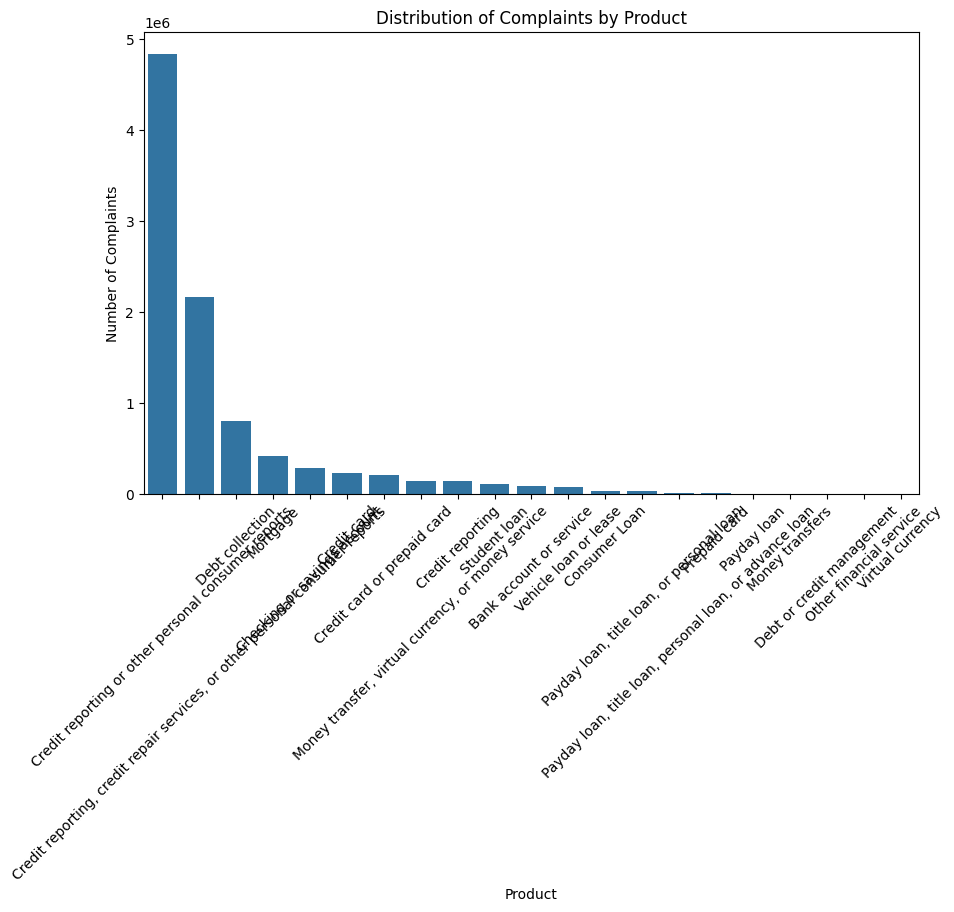

In [26]:
# Initial EDA
# 1. Analyze the distribution of complaints across different Products
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.show()

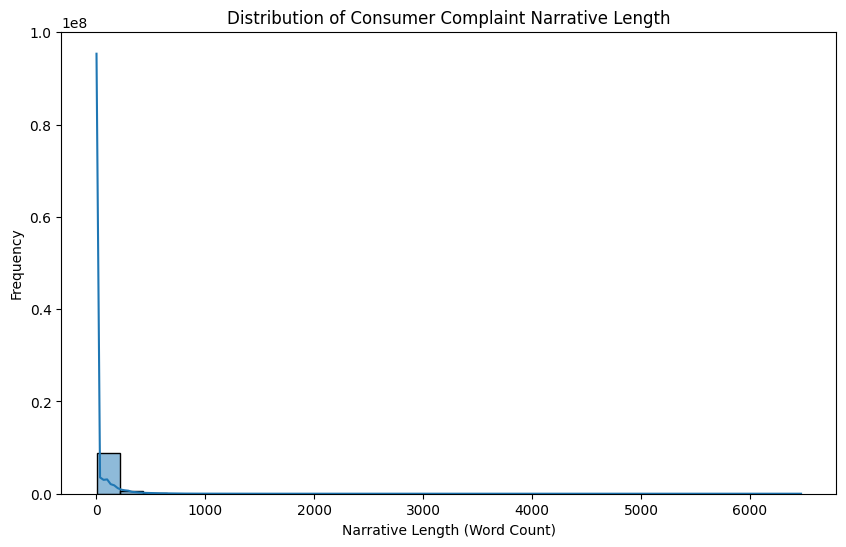

In [27]:
# 2. Calculate and visualize the length of Consumer complaint narrative
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=30, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Length')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

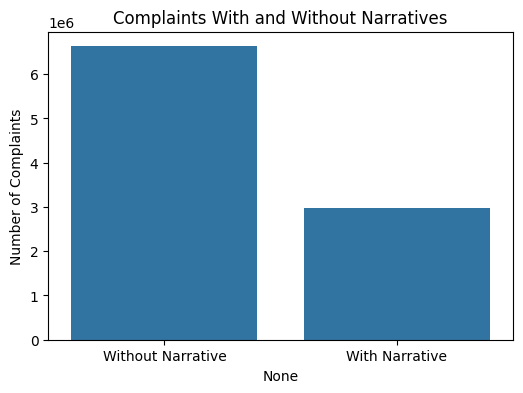

In [28]:
# 3. Identify number of complaints with and without narratives
narrative_counts = df['Consumer complaint narrative'].notnull().value_counts()
narrative_counts.index = ['Without Narrative', 'With Narrative']
plt.figure(figsize=(6, 4))
sns.barplot(x=narrative_counts.index, y=narrative_counts.values)
plt.title('Complaints With and Without Narratives')
plt.ylabel('Number of Complaints')
plt.show()

In [29]:
# Filter the dataset for specified products
products_of_interest = [
    'Credit card', 
    'Personal loan', 
    'Buy Now, Pay Later', 
    'Savings account', 
    'Money transfers'
]

filtered_df = df[df['Product'].isin(products_of_interest)]
# Remove records with empty narrative fields
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()]

In [30]:
filtered_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600696,2017-02-01,Credit card,NaN,APR or interest rate,NaN,My husband and I attended a XXXX XXXX XXXX tim...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,NJ,08610,NaN,Consent provided,Web,2017-02-01,Closed with monetary relief,Yes,No,2323561,224
9600751,2017-01-15,Credit card,NaN,Unsolicited issuance of credit card,NaN,I am an infrequent user of PayPal. I only use ...,NaN,"Paypal Holdings, Inc",IL,60126,NaN,Consent provided,Web,2017-01-18,Closed with explanation,Yes,No,2290909,399
9600903,2017-03-22,Credit card,NaN,Other,NaN,I have been doing business with Barclay Bank f...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,CT,06460,NaN,Consent provided,Web,2017-03-22,Closed with monetary relief,Yes,No,2400431,260
9601617,2015-10-16,Credit card,NaN,Credit determination,NaN,"Defamation of Character, False Credit Reportin...",NaN,JPMORGAN CHASE & CO.,MN,55987,NaN,Consent provided,Web,2015-10-16,Closed with explanation,Yes,Yes,1610424,444


In [31]:
# Clean the text narratives
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\b(i am writing to file a complaint|i would like to report|i want to file a complaint)\b', '', text)  # Remove boilerplate
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text.strip()

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)
# Save the cleaned and filtered dataset
filtered_df.to_csv('../data/filtered_complaints.csv', index=False)